In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# 1. Data Load

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.000,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.000,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.000,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.000,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.000,1


- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [5]:
numeric_col = [col for col in train if train[col].dtype != "object" ]
object_col = [col for col in train if train[col].dtype == "object" ]

In [6]:
len(numeric_col)

20

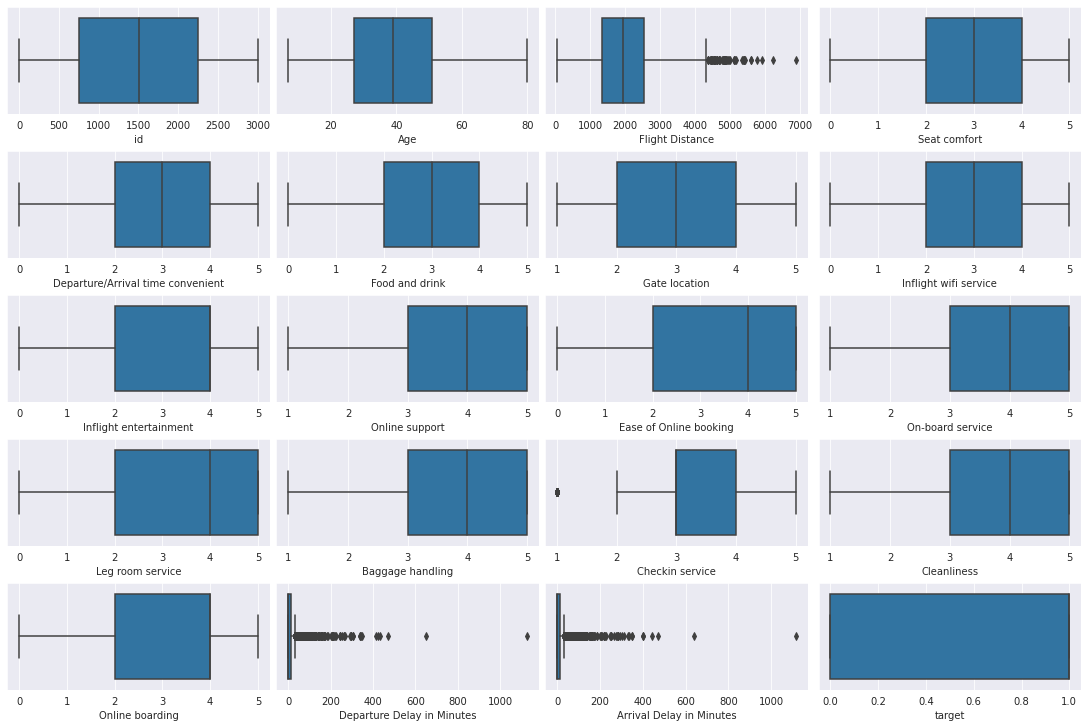

In [7]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(numeric_col)):
    plt.subplot( 5, 4, i+1 )
    sns.boxplot( train[numeric_col[i]] )

만족도에 관련된 컬럼은 hist로 다시 시각화

In [8]:
rank_col = [
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding'
 ]

In [9]:
len(rank_col)

14

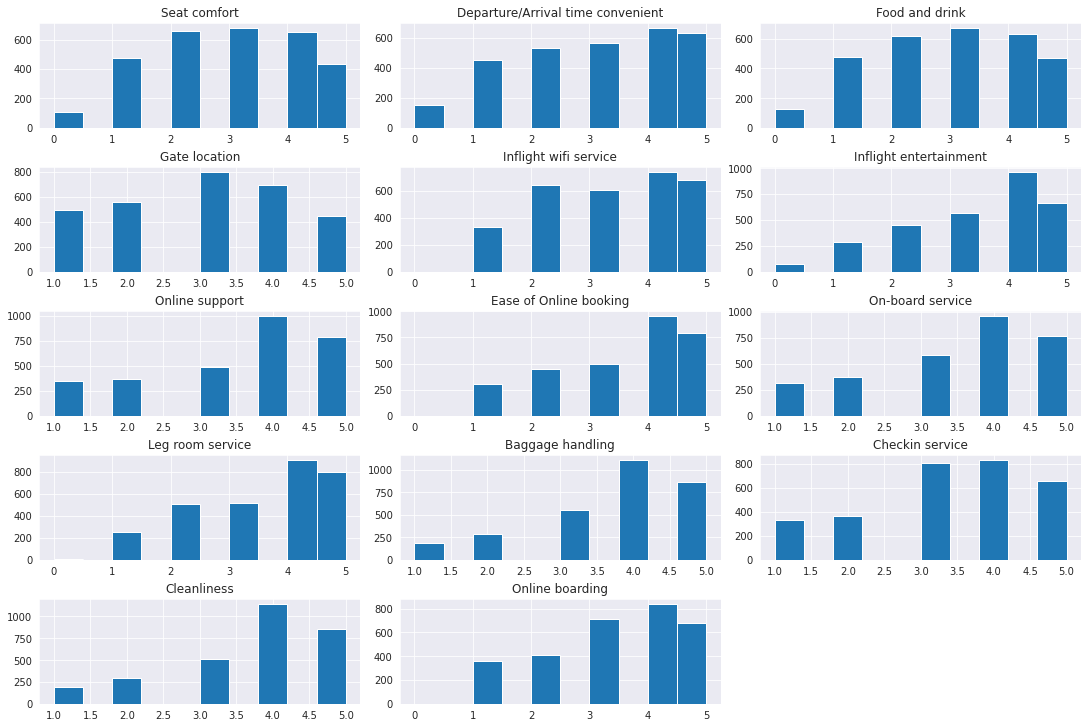

In [10]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(rank_col)):
    plt.subplot( 5, 3, i+1 )
    plt.hist( train[rank_col[i]] )
    plt.title(rank_col[i])

Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 에는 많은 이상치가 보였기에 이에 대한 확인을 진행

In [11]:
col = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

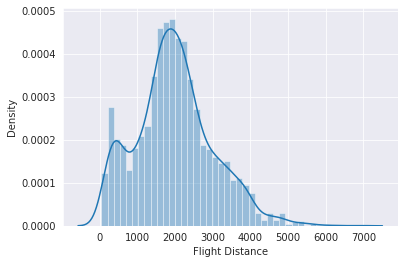

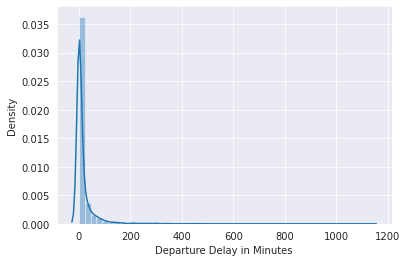

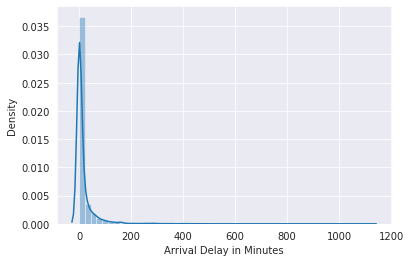

In [12]:
for i in col:
  sns.distplot(train[i])
  plt.show()

In [13]:
bad_time = train[train['Departure/Arrival time convenient'] <= 3]

In [14]:
print(len(bad_time) / 3000)

0.5673333333333334


In [15]:
train_out = train[col]
train_out.describe(percentiles = [.25, .44, .5, .75, .99])

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,3000.000,3000.000,3000.000
mean,1983.079,15.634,15.922
std,1028.109,45.083,45.203
min,52.000,0.000,0.000
25%,1348.250,0.000,0.000
44%,1794.560,0.000,0.000
50%,1937.000,0.000,0.000
75%,2547.250,12.000,13.000
99%,4800.060,206.010,203.040
max,6882.000,1128.000,1115.000


Departure/Arrival time convenient에 대해 만족하지 못한 사람(0~3점)의 비율이 56%이다. 이 변수와 delay 시간과의 연관성을 살펴보았는데, delay시간이 없는 경우에도 불만족한 고객이 있는 것을 확인할 수 있다.

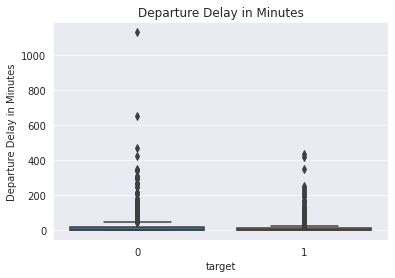

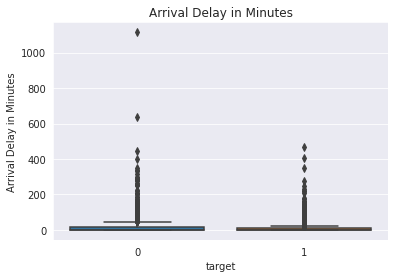

In [16]:
for i in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
  sns.boxplot(train['target'], train[i])
  plt.title(i)
  plt.show()

또한, delay 시간에 대한 큰 이상치들은 모두 불만족으로 분류되어있어 연관성이 있을 것이라 판단하여 제거하지 않는다.

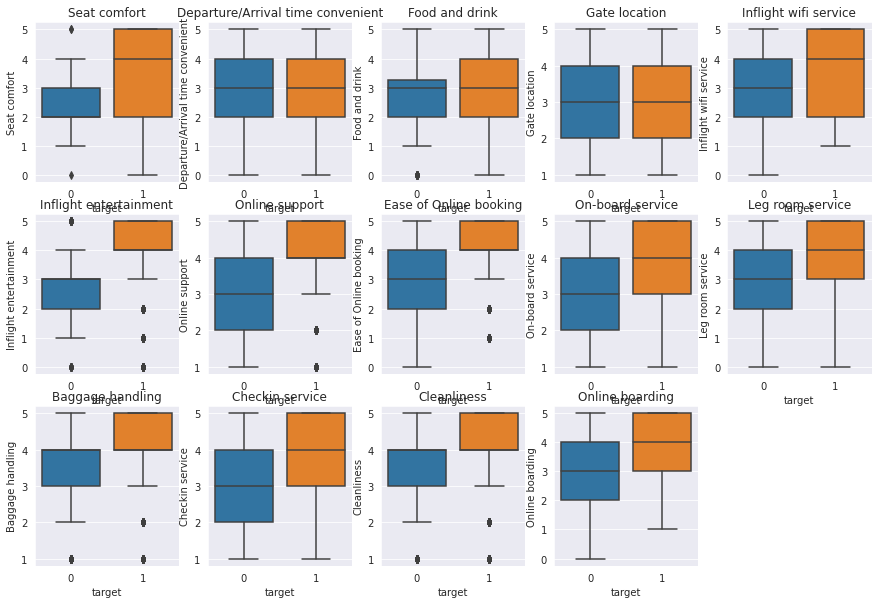

In [17]:
plt.figure(figsize=(15, 10))
for idx, i in enumerate(rank_col):
  plt.subplot(3, 5, idx+1)
  sns.boxplot(train['target'], train[i])
  plt.title(i)

In [18]:
len(object_col)

4

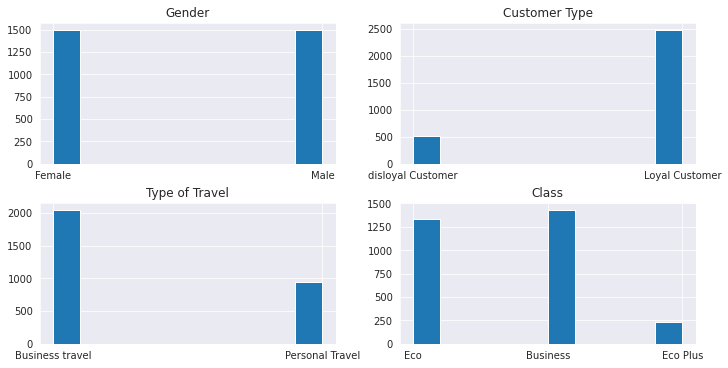

In [19]:
plt.figure( figsize=(10,5),
            constrained_layout = True )

for i in range(len(object_col)):
    plt.subplot( 2, 2, i+1 )
    plt.hist( train[object_col[i]] )
    plt.title(object_col[i])

위 변수들은 labelencoding 작업을 통해 numerical 변수로 변환!

# 2. Feature Engineering

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.target.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['target'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (5000, 23)


<AxesSubplot:>

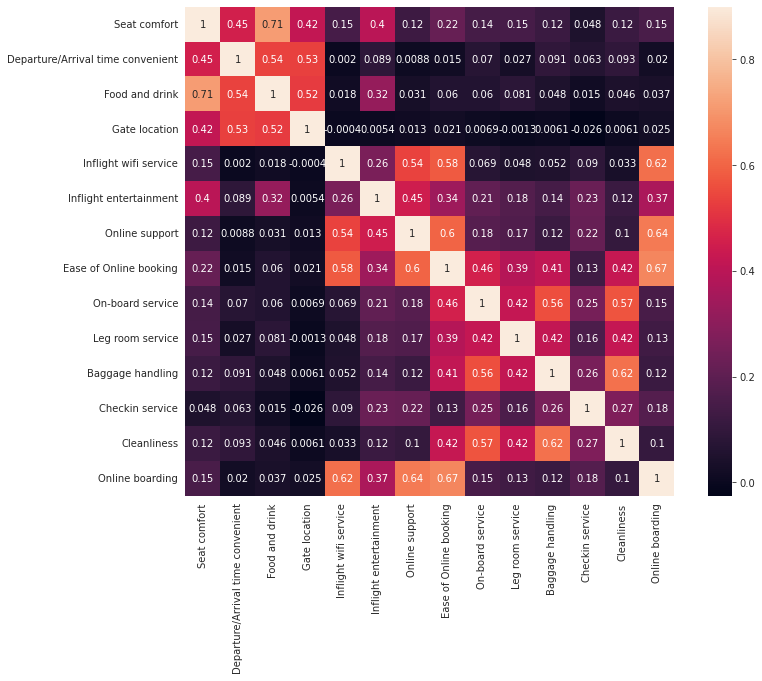

In [21]:
corrmat = all_data[rank_col].corr(method = 'spearman')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot = True)

전체 데이터에 대해서 correlation을 확인한 결과, 만족도 변수간의 큰 상관관계를 가지지는 않는것을 확인할 수 있다.

### 2. Log Transform

In [22]:
skewed_feats = all_data[col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Departure Delay in Minutes,8.982
Arrival Delay in Minutes,8.586
Flight Distance,0.457


delay minute 변수의 왜도가 상당히 심하기 때문에 log 변환 진행

In [23]:
for i in ['Departure Delay in Minutes','Arrival Delay in Minutes']:
  all_data[i] = np.log1p(all_data[i])

In [24]:
skewed_feats = all_data[col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Departure Delay in Minutes,0.942
Arrival Delay in Minutes,0.895
Flight Distance,0.457


위 3개의 변수는 값의 범위가 다른 변수들과 잘 맞지 않기 때문에 이를 Scaling

In [25]:
sc_data = all_data[col]

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
mms = MinMaxScaler()
mms.fit(sc_data)
sc_data = mms.transform(sc_data)

In [30]:
sc_df = pd.DataFrame(sc_data, columns=col)

In [31]:
sc_df

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.227,0.000,0.000
1,0.404,0.419,0.420
2,0.376,0.000,0.000
3,0.336,0.341,0.157
4,0.008,0.000,0.000
...,...,...,...
4995,0.001,0.000,0.000
4996,0.276,0.649,0.656
4997,0.344,0.000,0.198
4998,0.052,0.637,0.631


## 3. OneHotEncoding

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 5000 non-null   int64  
 1   Gender                             5000 non-null   object 
 2   Customer Type                      5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Type of Travel                     5000 non-null   object 
 5   Class                              5000 non-null   object 
 6   Flight Distance                    5000 non-null   int64  
 7   Seat comfort                       5000 non-null   int64  
 8   Departure/Arrival time convenient  5000 non-null   int64  
 9   Food and drink                     5000 non-null   int64  
 10  Gate location                      5000 non-null   int64  
 11  Inflight wifi service              5000 non-null   int64

### Numerical Feature to Category Feature

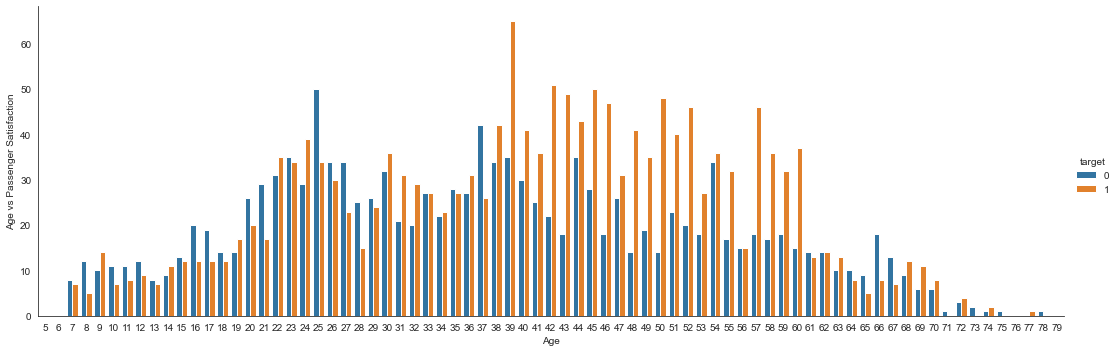

In [35]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='target', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

In [35]:
for l in range(len(all_data)): 
  all_data['Age'][l] = str(all_data['Age'][l] // 10)

In [36]:
all_data['Age'] = all_data['Age'].astype('str')

In [37]:
[col for col in all_data if all_data[col].dtype == "object" ]

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class']

In [38]:
all_data= pd.get_dummies(all_data)

In [39]:
all_data

,id,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Age_4,Age_5,Age_6,Age_7,Age_8,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,1599,3,0,3,3,4,3,4,4,...,0,0,0,0,0,1,0,0,1,0
1,2,2810,2,4,4,4,1,4,3,5,...,0,0,0,0,0,1,0,1,0,0
2,3,2622,1,1,1,1,4,5,5,4,...,1,0,0,0,0,1,0,1,0,0
3,4,2348,3,3,3,3,3,3,3,3,...,0,0,0,0,0,1,0,0,1,0
4,5,105,3,3,3,3,4,4,5,4,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1996,54,3,1,1,1,4,3,4,3,...,0,0,1,0,0,1,0,0,0,1
4996,1997,1937,4,4,4,4,3,5,5,5,...,0,0,0,0,0,1,0,1,0,0
4997,1998,2398,3,5,4,4,3,3,3,3,...,0,0,0,0,0,1,0,0,1,0
4998,1999,406,5,2,5,4,4,3,3,2,...,0,1,0,0,0,0,1,1,0,0


## 5. Train test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
all_data.drop('id', axis = 1, inplace = True)

In [42]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modeling

In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [45]:
def accuracy(true, pred):   
    score = np.mean(true==pred)
    return score

In [46]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [47]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [48]:
RF = RandomForestClassifier()

In [49]:
GBoost = GradientBoostingClassifier()

In [50]:
model_xgb = xgb.XGBClassifier()

In [51]:
model_lgb = lgb.LGBMClassifier()

In [52]:
model_cat = cat.CatBoostClassifier()

In [53]:
n_folds = 10

In [54]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [55]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = RF)

In [56]:
stacked_averaged_models.fit(train.values, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=1.02729e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=1.00749e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=1.02215e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=1.03197e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning

StackingAveragedModels(base_models=(Pipeline(steps=[('robustscaler',
                                                     RobustScaler()),
                                                    ('elasticnet',
                                                     ElasticNet(alpha=0.0005,
                                                                l1_ratio=0.9,
                                                                random_state=3))]),
                                    GradientBoostingClassifier(),
                                    KernelRidge(alpha=0.6, coef0=2.5, degree=2,
                                                kernel='polynomial')),
                       meta_model=RandomForestClassifier())

In [57]:
st_train_pred = stacked_averaged_models.predict(train)
print(accuracy(y_train, st_train_pred))

0.9363333333333334


In [58]:
model_xgb.fit(train, y_train)

[05:03:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
xgb_train_pred = model_xgb.predict(train)
print(accuracy(y_train, xgb_train_pred))

1.0


In [60]:
model_lgb.fit(train, y_train)

LGBMClassifier()

In [61]:
lgb_train_pred = model_lgb.predict(train)
print(accuracy(y_train, lgb_train_pred))

0.9996666666666667


In [62]:
model_cat.fit(train, y_train)

Learning rate set to 0.016469
0:	learn: 0.6751083	total: 48.2ms	remaining: 48.2s
1:	learn: 0.6605899	total: 50ms	remaining: 25s
2:	learn: 0.6443922	total: 51.9ms	remaining: 17.2s
3:	learn: 0.6296805	total: 53.5ms	remaining: 13.3s
4:	learn: 0.6160793	total: 55.4ms	remaining: 11s
5:	learn: 0.6029471	total: 57.2ms	remaining: 9.47s
6:	learn: 0.5903435	total: 59.1ms	remaining: 8.38s
7:	learn: 0.5793260	total: 61ms	remaining: 7.56s
8:	learn: 0.5677300	total: 62.7ms	remaining: 6.9s
9:	learn: 0.5572118	total: 64.3ms	remaining: 6.37s
10:	learn: 0.5464531	total: 66.3ms	remaining: 5.96s
11:	learn: 0.5360769	total: 68.1ms	remaining: 5.61s
12:	learn: 0.5259773	total: 69.7ms	remaining: 5.29s
13:	learn: 0.5159774	total: 71.3ms	remaining: 5.02s
14:	learn: 0.5061903	total: 73ms	remaining: 4.79s
15:	learn: 0.4985236	total: 74.3ms	remaining: 4.57s
16:	learn: 0.4884616	total: 76.1ms	remaining: 4.4s
17:	learn: 0.4811672	total: 77.8ms	remaining: 4.25s
18:	learn: 0.4738307	total: 79.5ms	remaining: 4.1s
19:	l

168:	learn: 0.1911193	total: 345ms	remaining: 1.7s
169:	learn: 0.1907077	total: 347ms	remaining: 1.69s
170:	learn: 0.1903153	total: 348ms	remaining: 1.69s
171:	learn: 0.1898089	total: 350ms	remaining: 1.69s
172:	learn: 0.1895170	total: 352ms	remaining: 1.68s
173:	learn: 0.1890391	total: 354ms	remaining: 1.68s
174:	learn: 0.1884343	total: 356ms	remaining: 1.68s
175:	learn: 0.1882319	total: 357ms	remaining: 1.67s
176:	learn: 0.1879338	total: 359ms	remaining: 1.67s
177:	learn: 0.1876699	total: 361ms	remaining: 1.67s
178:	learn: 0.1872712	total: 363ms	remaining: 1.66s
179:	learn: 0.1865642	total: 365ms	remaining: 1.66s
180:	learn: 0.1860013	total: 366ms	remaining: 1.66s
181:	learn: 0.1853411	total: 368ms	remaining: 1.65s
182:	learn: 0.1850651	total: 370ms	remaining: 1.65s
183:	learn: 0.1848900	total: 372ms	remaining: 1.65s
184:	learn: 0.1846541	total: 373ms	remaining: 1.65s
185:	learn: 0.1844254	total: 375ms	remaining: 1.64s
186:	learn: 0.1840281	total: 377ms	remaining: 1.64s
187:	learn: 0

377:	learn: 0.1289970	total: 725ms	remaining: 1.19s
378:	learn: 0.1288438	total: 727ms	remaining: 1.19s
379:	learn: 0.1286790	total: 728ms	remaining: 1.19s
380:	learn: 0.1284510	total: 730ms	remaining: 1.19s
381:	learn: 0.1283209	total: 732ms	remaining: 1.18s
382:	learn: 0.1281521	total: 734ms	remaining: 1.18s
383:	learn: 0.1278916	total: 736ms	remaining: 1.18s
384:	learn: 0.1276465	total: 737ms	remaining: 1.18s
385:	learn: 0.1274972	total: 739ms	remaining: 1.18s
386:	learn: 0.1272810	total: 741ms	remaining: 1.17s
387:	learn: 0.1271326	total: 743ms	remaining: 1.17s
388:	learn: 0.1268721	total: 744ms	remaining: 1.17s
389:	learn: 0.1266750	total: 747ms	remaining: 1.17s
390:	learn: 0.1266037	total: 748ms	remaining: 1.17s
391:	learn: 0.1264353	total: 750ms	remaining: 1.16s
392:	learn: 0.1263451	total: 751ms	remaining: 1.16s
393:	learn: 0.1261101	total: 753ms	remaining: 1.16s
394:	learn: 0.1260372	total: 755ms	remaining: 1.16s
395:	learn: 0.1258752	total: 756ms	remaining: 1.15s
396:	learn: 

569:	learn: 0.0971846	total: 1.11s	remaining: 835ms
570:	learn: 0.0971543	total: 1.11s	remaining: 834ms
571:	learn: 0.0970506	total: 1.11s	remaining: 832ms
572:	learn: 0.0968734	total: 1.11s	remaining: 831ms
573:	learn: 0.0965566	total: 1.12s	remaining: 829ms
574:	learn: 0.0963920	total: 1.12s	remaining: 827ms
575:	learn: 0.0962983	total: 1.12s	remaining: 826ms
576:	learn: 0.0961194	total: 1.12s	remaining: 824ms
577:	learn: 0.0960316	total: 1.13s	remaining: 822ms
578:	learn: 0.0959103	total: 1.13s	remaining: 821ms
579:	learn: 0.0957514	total: 1.13s	remaining: 819ms
580:	learn: 0.0957159	total: 1.13s	remaining: 817ms
581:	learn: 0.0955116	total: 1.14s	remaining: 816ms
582:	learn: 0.0953497	total: 1.14s	remaining: 814ms
583:	learn: 0.0952717	total: 1.14s	remaining: 813ms
584:	learn: 0.0951299	total: 1.14s	remaining: 811ms
585:	learn: 0.0950263	total: 1.15s	remaining: 809ms
586:	learn: 0.0949160	total: 1.15s	remaining: 808ms
587:	learn: 0.0948059	total: 1.15s	remaining: 806ms
588:	learn: 

759:	learn: 0.0778948	total: 1.49s	remaining: 470ms
760:	learn: 0.0778052	total: 1.49s	remaining: 468ms
761:	learn: 0.0776731	total: 1.49s	remaining: 466ms
762:	learn: 0.0775723	total: 1.49s	remaining: 464ms
763:	learn: 0.0775208	total: 1.49s	remaining: 462ms
764:	learn: 0.0774432	total: 1.5s	remaining: 460ms
765:	learn: 0.0773640	total: 1.5s	remaining: 458ms
766:	learn: 0.0772710	total: 1.5s	remaining: 456ms
767:	learn: 0.0771420	total: 1.5s	remaining: 454ms
768:	learn: 0.0770552	total: 1.5s	remaining: 452ms
769:	learn: 0.0769600	total: 1.5s	remaining: 450ms
770:	learn: 0.0768704	total: 1.51s	remaining: 448ms
771:	learn: 0.0767521	total: 1.51s	remaining: 446ms
772:	learn: 0.0766369	total: 1.51s	remaining: 444ms
773:	learn: 0.0764991	total: 1.51s	remaining: 442ms
774:	learn: 0.0763923	total: 1.51s	remaining: 440ms
775:	learn: 0.0762842	total: 1.52s	remaining: 438ms
776:	learn: 0.0761470	total: 1.52s	remaining: 436ms
777:	learn: 0.0759763	total: 1.52s	remaining: 434ms
778:	learn: 0.0759

962:	learn: 0.0623521	total: 1.87s	remaining: 71.8ms
963:	learn: 0.0623050	total: 1.87s	remaining: 69.8ms
964:	learn: 0.0622658	total: 1.87s	remaining: 67.9ms
965:	learn: 0.0622301	total: 1.87s	remaining: 66ms
966:	learn: 0.0621410	total: 1.88s	remaining: 64ms
967:	learn: 0.0620938	total: 1.88s	remaining: 62.1ms
968:	learn: 0.0620562	total: 1.88s	remaining: 60.1ms
969:	learn: 0.0620135	total: 1.88s	remaining: 58.2ms
970:	learn: 0.0619686	total: 1.88s	remaining: 56.3ms
971:	learn: 0.0619322	total: 1.89s	remaining: 54.3ms
972:	learn: 0.0618874	total: 1.89s	remaining: 52.4ms
973:	learn: 0.0618682	total: 1.89s	remaining: 50.4ms
974:	learn: 0.0618200	total: 1.89s	remaining: 48.5ms
975:	learn: 0.0617689	total: 1.89s	remaining: 46.5ms
976:	learn: 0.0617090	total: 1.89s	remaining: 44.6ms
977:	learn: 0.0616190	total: 1.9s	remaining: 42.6ms
978:	learn: 0.0615800	total: 1.9s	remaining: 40.7ms
979:	learn: 0.0615548	total: 1.9s	remaining: 38.8ms
980:	learn: 0.0615316	total: 1.9s	remaining: 36.8ms
9

In [65]:
cat_train_pred = model_cat.predict(train)
print(accuracy(y_train, cat_train_pred))

0.993


In [66]:
st_test_pred = stacked_averaged_models.predict(test)
xgb_test_pred = model_xgb.predict(test)
lgb_test_pred = model_lgb.predict(test)
cat_test_pred = model_cat.predict(test)

In [67]:
ensemble = st_test_pred*0.1 + xgb_test_pred*0.3 + lgb_test_pred*0.3 + cat_test_pred * 0.3

In [68]:
for i in range(len(ensemble)):
  ensemble[i] = 0 if ensemble[i] < 0.5 else 1

In [69]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = ensemble
sub.to_csv('stack_submission.csv', index=False)

In [70]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = cat_test_pred
sub.to_csv('cat_submission.csv', index=False)

In [71]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = lgb_test_pred
sub.to_csv('lgb_submission.csv', index=False)

In [72]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = xgb_test_pred
sub.to_csv('xgb_submission.csv', index=False)

In [71]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = st_test_pred
sub.to_csv('st_submission.csv', index=False)